# 02 - Core concepts

In this notebook, we will review:
- Estimators in scikit-learn, what are them and some of their methods.
- How estimators can be supervised models that perform classification or regression tasks, as well as unsupervised models.
- Common metrics used to evaluate the estimator performance.

---

# Estimators

In scikit-learn an [estimator](https://scikit-learn.org/stable/tutorial/statistical_inference/settings.html#estimators-objects) is a Python object that learns from data.

(...) An estimator comes with some associated methods. We will review these throughout this tutorial.

Most importantly, in scikit-learn both supervised and unsupervised models are created using estimator objects. Let's review each of them in turn.


# Supervised models

(...) Explain supervised models

(...) They divide into regression and classification models. (difference between regression and classification)


## Linear Regression

We will make a quick recap of linear regression models, but we will not provide a detailed description. Be sure to read one of our additional resources if you want to refresh your knowledge or dig deeper into the topic.

As a machine learning model, linear regression predicts the values of a continuous variable from a linear combination of the values in one or more features.

For example, if we had a dataset $X$ contaning the values of features $x1$ and $x2$, the value $\hat{y}$ predicted by linear regression could be expressed as:

$$\hat{y} = ax1 + bx2 + c$$

> where $a$, $b$ and $c$ are the parameters the model learns from the data to make the predictions

- !! Add vector notation

- !! Explain training and loss
     - Supervised approach --> The model learns the parameters that minimize the distance between the predictve value and the real value


Let's now see how we can fit a linear regression model using scikit-learn.

In scikit-learn, we can easily create a fake dataset for fitting a linear regression model using the `make_regression` method (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression)). 

Let's create one dataset with 400 samples and 100 features. We will also define 20 of these features as informative, and add some gaussian noise to the data to make the task harder for the model.

In [1]:
import numpy as np
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=400, n_features=100, n_informative=20, noise=10, random_state=0
)
print(f"Shape of dataset: {np.shape(X)}")
print(f"Shape of targets: {np.shape(y)}")

Shape of dataset: (400, 100)
Shape of targets: (400,)


Since it's a regression problem, let's make sure the target of our model is a continuous variable. Let's print the first ten values of `y`:

In [2]:
print(y[:10])

[-258.45661829 -357.87561738  108.00450947   -8.40675451 -226.74854238
  -38.23202934   18.14753729 -821.27365083  320.76896452  145.63900011]


Now let's create a linear regression estimator using `LinearRegression` (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)).

In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

Estimator objects contain certain parameters that define how they will behave when learning the data, as well as their outputs. Let's inspect the parameters of `reg`:

In [4]:
vars(reg)

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

These parameters can be changed by modifying their corresponding attributes when calling the estimator, or afterwards in the following way:

In [5]:
reg.set_params(**{"normalize": True})
vars(reg)

{'fit_intercept': True,
 'normalize': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

### Training the model

Once the object has been created, we can now train the model using our data. For this we need to call the `fit` method, and pass our data (`X`) and target (`y`) as input:

In [6]:
# Fit linear regression model
reg = reg.fit(X, y)

Let's inspect the attributes of `reg` again:

In [7]:
vars(reg).keys()

dict_keys(['fit_intercept', 'normalize', 'copy_X', 'n_jobs', 'positive', 'n_features_in_', 'coef_', '_residues', 'rank_', 'singular_', 'intercept_'])

`reg` now contains new attributes, which are refered to as _estimated parameters_, because they have been learned from the data. In scikit-learn, these are indexed by an underscore (`_`) at the end. 

For example, we can now access the coefficients learned by our linear model. We should have as many coefficients as features in our dataset:

In [8]:
print(f"Number of coefficients: {reg.coef_.shape[0]}")

Number of coefficients: 100


Let's also print the values of some of them, and the value of the intercept.

In [9]:
coefs = reg.coef_
intercept = reg.intercept_

print(f"Model coefficients (first 10):\n {coefs[:10]} \n")
print(f"Model intercept: \n {intercept}")

Model coefficients (first 10):
 [-1.13225733 -0.37761699 -0.55009782  0.11689833 -0.3783587   0.28209964
 -0.11756948 96.29011361 -1.00224858 81.99109074] 

Model intercept: 
 -0.49212396559274585


### Making predictions with the model

Now that our model is fitted, we can use it to make predictions. In scikit-learn, this is achieved by calling the method `predict`. 

Let's predict the values of `X` using our fitted model, and visually compare them to their real values for the first ten samples:

In [10]:
import pandas as pd

# Predict labels with trained model
y_pred = reg.predict(X)

# Create dataframe for printing the predictions
df = pd.DataFrame({"y_pred": y_pred[:10], "y_real": y[:10]})
df

,y_pred,y_real
0,-269.240138,-258.456618
1,-349.576199,-357.875617
2,106.003478,108.004509
3,-31.193701,-8.406755
4,-240.331344,-226.748542
5,-44.646219,-38.232029
6,3.240374,18.147537
7,-819.226112,-821.273651
8,322.174534,320.768965
9,158.470684,145.639000


### Scoring the model

We can use these predictions to evaluate the performance of the model. That is, estimate how wrong the model is by quantifing the difference between the predicted values and the real ones. 

In scikit-learn we can evaluate this performance using the method `score`. Let's use this method to evaluate how well our model predicts the targets of our fake dataset:

In [11]:
score = reg.score(X, y)
print(f"Linear model R2: {np.round(score,3)}")

Linear model R2: 0.999


By default, linear models are evaluated by calculating $R^2$.

(...) Explain $R^2$

There are other scoring metrics for regression problems besides $R^2$. Check the module [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for an overview of the alternatives.

#### ✍️ Exercise

Suppose we already have `X` and `y` defined and we want perform linear regression on our data. Why would the following code fail?

```
reg = LinearRegression()
reg.score(X, y)
```

Can you fix it? Click the three dots to reveal the answer.

The code did not fit the model! For it to work it should read:

```
reg = LinearRegression()
reg.fit(X, y)
reg.score(X, y)
```

## Logistic regression

As mentioned, classification models are also estimators. One of the most popular classification models is __logistic regression__

(...) Explain logistic regression


Let's create a fake dataset ready for classification using the `make_classification` method (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification)). 

In [12]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=400, n_features=100, n_informative=20, random_state=0
)

Our `y` should now be a categorical variable. Let's print 10 samples of it to make sure:

In [13]:
print(y[:10])

[1 0 0 1 0 1 1 0 1 1]


Let's now create a `LogisticRegression` estimator (read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)) and fit it to our data:

In [14]:
from sklearn.linear_model import LogisticRegression

# Create model
clf = LogisticRegression()

# Fit model
clf = clf.fit(X, y)

#### ✍️ Exercise

Do you remember how to inspect the coefficients and intercept of the model? Try it below, and press the three dots to check your answer.

In [22]:
## Answer
coefs = clf.coef_
intercept = clf.intercept_

print(f"Coefficients:\n{coefs}\n")
print(f"Intercept:{intercept}")

Coefficients:
[[-1.37865003e-01 -2.20273104e-02 -2.39241152e-01 -2.46015623e-01
   2.16858205e-02  3.34134331e-01  9.73462720e-02  4.68957239e-01
  -2.61039306e-02  2.60097530e-01 -1.16922255e-01  8.29380097e-02
   6.47792823e-02  2.51815595e-01  8.06678768e-02 -1.15678354e-01
  -1.62860155e-02  3.04076427e-01 -9.55243706e-02  1.76554979e-01
   2.68770910e-01  4.08755553e-01 -9.16686833e-02  2.02690284e-01
   1.89689277e-01 -6.68554434e-02 -2.98456270e-01  5.43628947e-01
   1.87324488e-01  1.00905626e-01 -1.77535049e-01 -5.64612899e-02
  -3.37429083e-01 -1.15636106e-01 -6.12942018e-02  1.94713366e-01
   1.40376760e-01 -2.42602368e-01 -1.00217142e-02 -2.05849597e-01
  -3.19467820e-03 -1.34768011e-01 -9.70155832e-02  1.22589582e-02
  -6.26549917e-01 -5.70595245e-01 -1.14932718e-01 -2.73770288e-01
   1.25677528e-04  1.31212109e-02  1.54177311e-01 -2.33365126e-01
  -9.09854209e-02  7.55769732e-02 -1.88509599e-01 -3.29841934e-01
   6.12481338e-02 -3.27147610e-01 -2.11144886e-01  2.05836757e

Let's also compare the model predictions of the first 10 samples of `X` to their real labels:

In [23]:
# Predict labels with trained model
y_pred = clf.predict(X[:10])
y_real = y[:10]

# Create dataframe for printing the predictions
df = pd.DataFrame({"y_pred": y_pred, "y_real": y_real})
df

,y_pred,y_real
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,1,1
6,0,1
7,0,0
8,1,1
9,1,1


### Probabilistic predictions

Logistic Regression is a [probabilistic classifier](https://en.wikipedia.org/wiki/Probabilistic_classification), meaning it predicts a probability distribution over the classes.

In _scikit-learn_ we can inspect the probabilities assigned to each class in the following manner:

In [49]:
# Predict the probability of each class
y_pred_proba = clf.predict_proba(X[:10])

# Create dataframe for printing the predictions
df = pd.DataFrame(y_pred_proba, columns=["class 0", "class 1"])
df

,class 0,class 1
0,0.092846,0.907154
1,0.987344,0.012656
2,0.997656,0.002344
3,0.999994,0.000006
4,0.999740,0.000260
5,0.324488,0.675512
6,0.379519,0.620481
7,0.982641,0.017359
8,0.007852,0.992148
9,0.011529,0.988471


### Confusion matrix

By default, the predictions made by `LogisticRegression` when calling `score` are evaluated by computing the __mean accuracy__ of the predictions:

In [24]:
# Score predictions
score = clf.score(X, y)
print(f"Mean accuracy: {np.round(score, 2)}")

Mean accuracy: 0.86


Besides scoring the model, in classification problems, it is very common to plot the __confusion matrix__ of the predictions.

(...) Explain what is a confusion matrix. Paste picture.


We will now learn how to plot the confusion matrix of the predictions of some model in scikit-learn. 

We will first create an imbalanced classification dataset, meaning one containing more samples from one of the classes than the other. This dataset will make the example more interesting. We can create the imbalance by setting the parameter `weights` of `make_classification`: 

In [29]:
# Create dataset
X, y = make_classification(
    n_samples=400, n_features=100, n_informative=20, 
    weights=[0.8, 0.2], random_state=0
)

Let's now create and fit a logistic regression model, and use it to make predictions.

In [30]:
# Create and fit model
clf = LogisticRegression().fit(X, y)

# Use model to make predictions
y_pred = clf.predict(X)

Using the predicted labels, we can now run this computation using the function `confusion_matrix` (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)), and display it using `ConfusionMatrixDisplay` (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)):

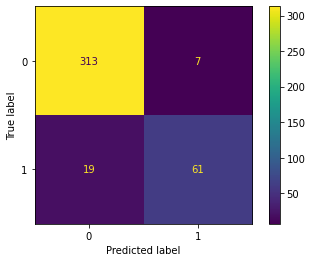

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y, y_pred, labels=clf.classes_)
cm_display = ConfusionMatrixDisplay(conf_matrix).plot()

(...) Explain output

#### ✍️ Exercise

There are other ways of scoring your model besides computing its mean accuracy. Read the documentation about scoring the [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) and the [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) of a model. 

Can you implement these score functions yourself? Try them below, and press the three dots to reveal the solution.

In [34]:
# Answer
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y, y_pred)
print(f"Recall: {recall}")

Precision: 0.8970588235294118
Recall: 0.7625


## K-Means

Unsupervised models are also estimators in scikit-learn, since they also learn from data

- (...) recap of unsupervised learning:
    - the goal is to find interesting or useful structure in the data
    - we don't have the ground truth

Clustering methods are unsupervised models. 
    - (...) explain clustering methods

One popular clustering method is k-means
    - (...) Explain how k-means work

Let's generate a dataset suitable for clustering using `make_blobs` (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)) which generates Gaussian shaped blobs:

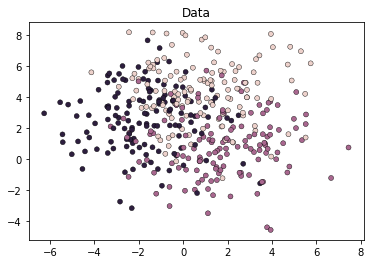

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=400, n_features=2, random_state=0, cluster_std=2
)

#X, y = make_moons(noise=0.352, random_state=1, n_samples=100)

sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y,
    marker='o', s=25, edgecolor='k', legend=False
).set_title("Data")
plt.show()

We can perform k-means clustering by calling `KMeans` in scikit-learn (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)). We will pre-define $k$ to be equal to 5.

In [55]:
from sklearn.cluster import KMeans

# Create model
kmeans = KMeans(n_clusters=5)

# Fit model
kmeans = kmeans.fit(X, y)

Since this is an unsupervised method and there is no real truth labels, we cannot compute the accuracy of the fitted model. But we can compute the average distance of the labeled example to the center of their assigned cluster using the `score` function:

In [56]:
# Compute average distance
score = kmeans.score(X, y)
print(f"Average distance: {score}")

Average distance: -1277.7026949198228


If you want to read more about the meaning behind the returned value, read [this answer](https://stackoverflow.com/questions/32370543/understanding-score-returned-by-scikit-learn-kmeans) on stackoverflow.

More importantly, we can now use our fitted model to predict to which cluster the observations belong to. Let's predict the assignment of the first 10 observations:

In [59]:
# Predict cluster label
y_pred = kmeans.predict(X)
print(f"Predicted labels (first 10): {y_pred[:10]}")

Predicted labels (first 10): [4 4 1 3 0 1 1 0 0 1]


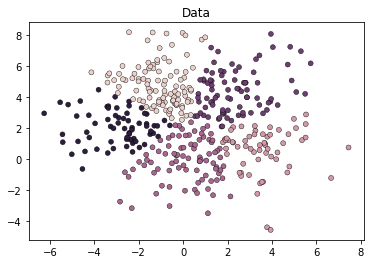

In [60]:
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y_pred,
    marker='o', s=25, edgecolor='k', legend=False
).set_title("Data")
plt.show()

We have the same number of predicted labels as the number of $k$.

### ✍️ Exercise 

Can you create a `KMeans` model specifying the correct number of clusters (`k=3`) and plot its predictions? Try it below and press the three dots to see the solution.

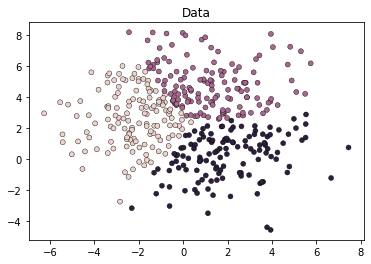

In [64]:
#Answer
# Create model
kmeans = KMeans(n_clusters=3)

# Fit model
kmeans = kmeans.fit(X, y)

# Predict labels
y_pred = kmeans.predict(X)

# Plot predicted labels
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y_pred,
    marker='o', s=25, edgecolor='k', legend=False
).set_title("Data")
plt.show()

# Check your knowledge

Load the ABIDE 2 dataset and:

1. Use logistic regression to predict "group" from the ROI features.
    - How accurate is the model?
2. Compute the confusion matrix and inspect the proportion of false positives and false negatives.
3. Compute the precision-recall curve.



# Additional reading

- [Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html): A useful map to decide which estimator is best given your dataset and learning goal.